## Objective

Experiment with:

* Sobel gradient threshold
* Color channel threshold
* Combination of the two above

in order to try to isolate lane lines.  

The input images will be distortion corrected and warped lane line images.



## Color channel thresholding

In [9]:
import cv2
import os
import matplotlib.pyplot as plt
import glob
import numpy as np

image_name: intermediate_images/test2-warped.jpg
binary.shape: (720, 1280)
image_name: intermediate_images/test5-warped.jpg
binary.shape: (720, 1280)
image_name: intermediate_images/test6-warped.jpg
binary.shape: (720, 1280)
image_name: intermediate_images/test3-warped.jpg
binary.shape: (720, 1280)
image_name: intermediate_images/test4-warped.jpg
binary.shape: (720, 1280)
image_name: intermediate_images/test1-warped.jpg
binary.shape: (720, 1280)


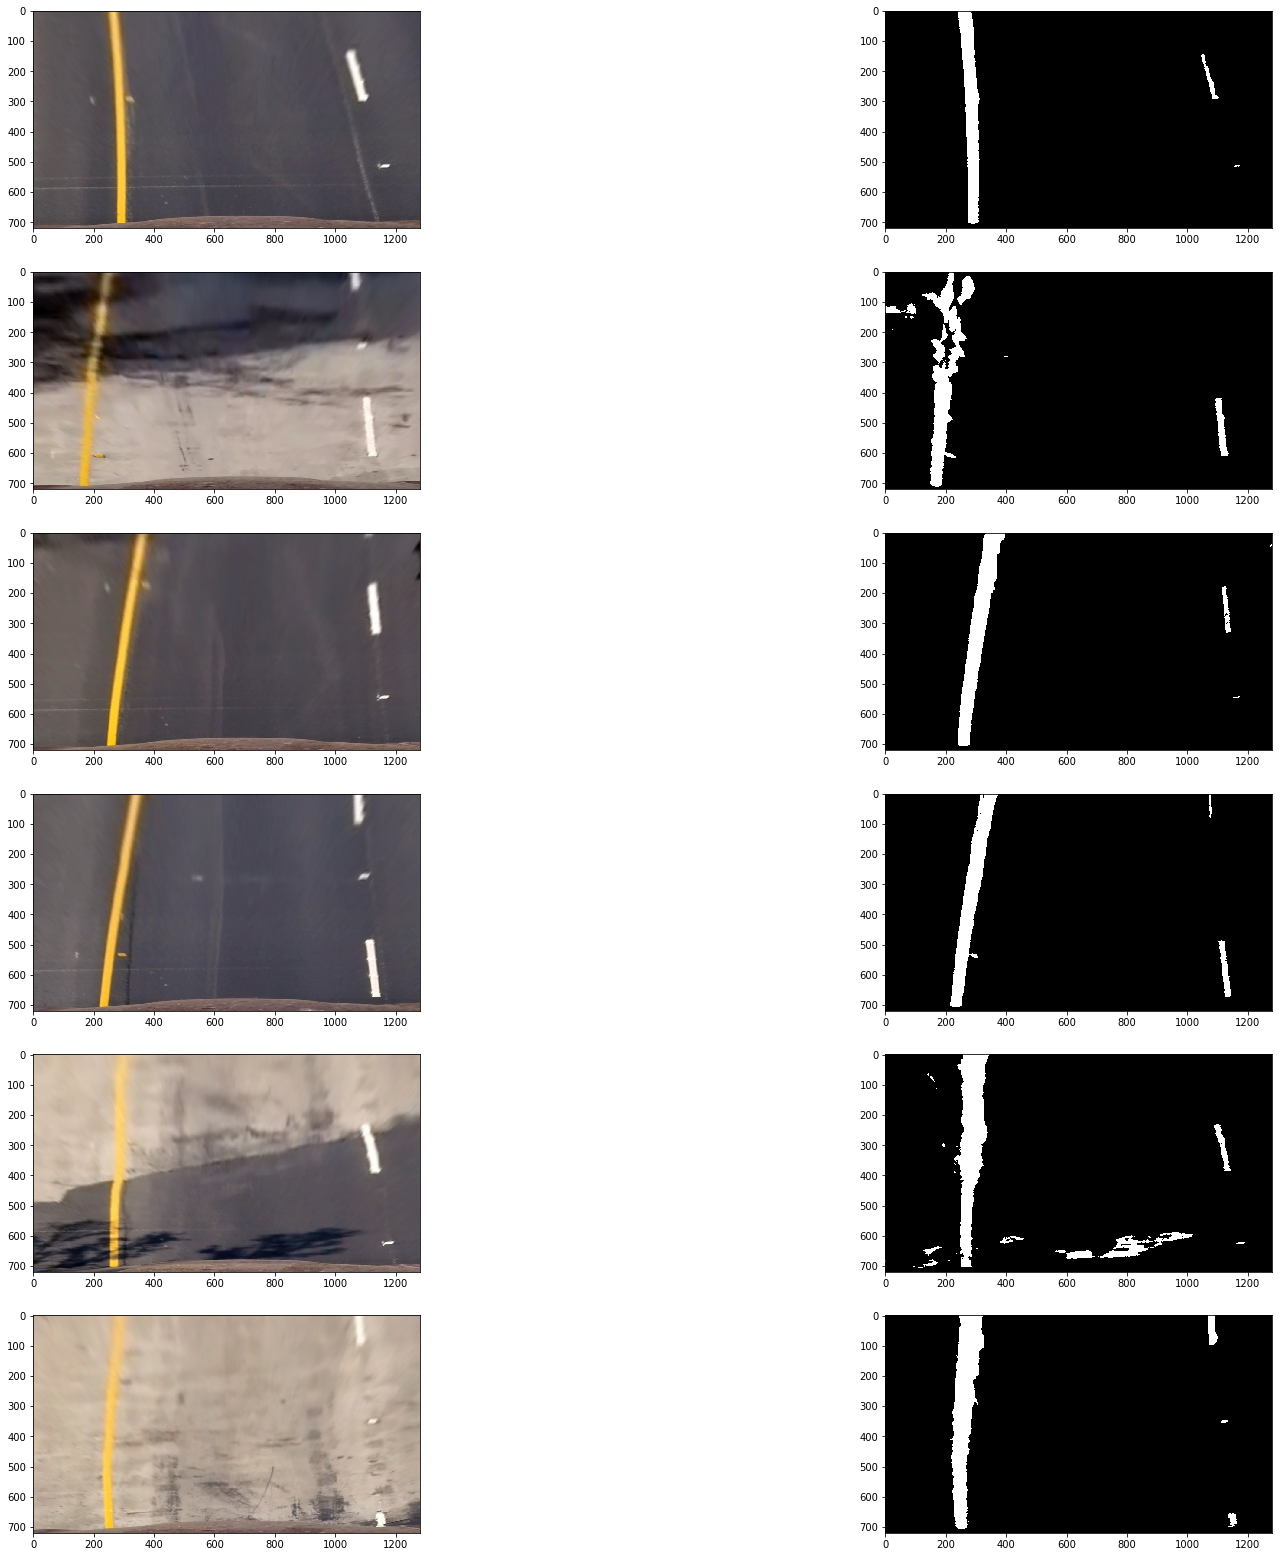

In [16]:

fig=plt.figure(figsize=(28, 28))
columns = 2
rows = 6

# Loop over sample images
image_names = glob.glob('intermediate_images/*warped.jpg')
i = 1
for image_name in image_names:
    
    print("image_name: {}".format(image_name))

    # Load image
    img = cv2.imread(image_name)

    
    fig.add_subplot(rows, columns, i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    i += 1
    
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    
    
    thresh = (90, 255)
    binary = np.zeros_like(S)
    binary[(S > thresh[0]) & (S <= thresh[1])] = 1
    
    fig.add_subplot(rows, columns, i)
    #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    plt.imshow(binary, cmap='gray')
    #plt.imshow(S, cmap='gray')
    print("binary.shape: {}".format(binary.shape))
    
    image_name_no_path = os.path.split(image_name)[-1]
    image_name_no_ext = os.path.splitext(image_name_no_path)[0]
    binary_image_name = image_name_no_ext + "-binary" + ".jpg"
    binary_image_path = os.path.join("intermediate_images", binary_image_name)
    cv2.imwrite(binary_image_path, binary)
    

    i += 1
    
plt.show()

    
# Convert to HSV

# Threshold on the "S


## Sobel gradient

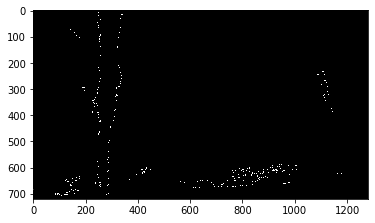

In [13]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = img
    
    # Apply cv2.Sobel()
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    # Take the absolute value of the output from cv2.Sobel()
    abs_sobel = np.absolute(sobel)

    # Scale the result to an 8-bit range (0-255)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))

    # Apply lower and upper thresholds
    
    sxbinary = np.zeros_like(scaled_sobel)
    
    sxbinary[(scaled_sobel > thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    # Create binary_output
    return sxbinary


# Loop over sample images
#image_names = glob.glob('intermediate_images/*warped.jpg')
image_name = "intermediate_images/test4-warped.jpg"
#for image_name in image_names:

# Load image
img = cv2.imread(image_name)

hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
S = hls[:,:,2]
thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1


sobel = abs_sobel_thresh(binary, orient='x', thresh_min=20, thresh_max=100)

plt.imshow(sobel, cmap='gray')
    
    